In [1]:
import numpy as np
import itertools
from itertools import permutations
from itertools import combinations
from itertools import product
import matplotlib.pyplot as plt
import sympy as sp
import copy

#MesonParticle = [coefficient, [flavorstructure]]
pip = [1, [2.2, 1]]
pipB = [1, [1.2, 2]]
pi0 = [[1/(sp.sqrt(2)), [2.2, 2]], [-1/(sp.sqrt(2)), [1.2, 1]]]
pi0B = [[1/(sp.sqrt(2)), [2.2, 2]], [-1/(sp.sqrt(2)), [1.2, 1]]]
pim = [-1, [1.2, 2]]
pimB = [-1, [2.2, 1]]
eta0 = [[1, [2.2, 2]], [1, [1.2, 1]]]
eta0B = [[1, [2.2, 2]], [1, [1.2, 1]]]
kaonp = [1, [3.2, 1]]
kaonpB = [1, [1.2, 3]]
kaonm = [1, [3.2, 2]]
kaonmB = [1, [2.2, 3]]
phi0 = [1, [3.2, 3]]
phi0B = [1, [3.2, 3]]

#BaryonParticle = [coefficient, [flavorstructure]]
deltapp = [1, [1, 1, 1]]
deltappB = [1, [1.2, 1.2, 1.2]]
deltap = [sp.sqrt(3), [1, 1, 2]]
deltapB = [sp.sqrt(3), [2.2, 1.2, 1.2]]
delta0 = [sp.sqrt(3), [1, 2, 2]]
delta0B = [sp.sqrt(3), [2.2, 2.2, 1.2]]
deltam = [1, [2, 2, 2]]
deltamB = [1, [2.2, 2.2, 2.2]]
sigmap = [1, [1, 1, 3]]
sigmapB = [1, [3.2, 1.2, 1.2]]
sigma0 = [sp.sqrt(2), [1, 2, 3]]
sigma0B = [sp.sqrt(2), [3.2, 2.2, 1.2]]
sigmam = [1, [2, 2, 3]]
sigmamB = [1, [3.2, 2.2, 2.2]]
nucleonp = [1, [1, 1, 2]]
nucleonpB = [1, [2.2, 1.2, 1.2]]
nucleon0 = [-1, [2, 2, 1]]
nucleon0B = [-1, [1.2, 2.2, 2.2]]
xi0 = [1, [3, 3, 1]]
xi0B = [1, [1.2, 3.2, 3.2]]
xim = [1, [3, 3, 2]]
ximB = [1, [2.2, 3.2, 3.2]]
lambda0 = [1, [1, 2, 3]]
lambda0B = [1, [3.2, 2.2, 1.2]]
omegam = [1, [3, 3, 3]]
omegamB = [1, [3.2, 3.2, 3.2]]



Deltapp = ["d2", deltapp]
DeltappB = ["d2", deltappB]
Deltap = ["d1", deltap]
DeltapB = ["d1", deltapB]
Delta0 = ["d0", delta0]
Delta0B = ["d0", delta0B]
Deltam = ["d2", deltam]
DeltamB = ["d2", deltamB]
Sigmap = ["s1", sigmap]
SigmapB = ["s1", sigmapB]
Sigma0 = ["s0", sigma0]
Sigma0B = ["s0", sigma0B]
Sigmam = ["s1", sigmam]
SigmamB = ["s1", sigmamB]
Nucleonp = ["n", nucleonp]
NucleonpB = ["n", nucleonpB]
Nucleon0 = ["n", nucleon0]
Nucleon0B = ["n", nucleon0B]
Xi0 = ["x", xi0]
Xi0B = ["x", xi0B]
Xim = ["x", xim]
XimB = ["x", ximB]
Lambda0 = ["l", lambda0]
Lambda0B = ["l", lambda0B]
Omegam = ["o", omegam]
OmegamB = ["o", omegamB]


Pip = ["M", pip]
PipB = ["M", pipB]
Pi0 = ["M", pi0]
Pi0B = ["M", pi0B]
Pim = ["M", pim]
PimB = ["M", pimB]
Eta0 = ["M", eta0]
Eta0B = ["M", eta0B]
Kaonp = ["M", kaonp]
KaonpB = ["M", kaonpB]
Kaonm = ["M", kaonm]
KaonmB = ["M", kaonmB]
Phi0 = ["M", phi0]
Phi0B = ["M", phi0B]

<h1> Unsimplified Wick Contractions <h1>

In [7]:
def Correlator(Sink, Source):

    def sgn(number):
        if number > 0:
            return '+'
        elif number < 0:
            return '-'
        else:
            return '0'

    def permutation_sign(permuted_elements):
        inversions = 0
        nF = len(permuted_elements)
        for i in range(nF):
            for j in range(i + 1, nF):
                if permuted_elements[i] > permuted_elements[j]:
                    inversions += 1
        sign = (-1) ** inversions
        return sign

    def is_valid_contraction(candidate, Start_List):
        all_elements = [elem1 for pairK in candidate for elem1 in pairK]
        return len(set(map(tuple, all_elements))) == len(Start_List)


    
    def Generate_Contraction(Start_List):
        pairs = [list(pair) for pair in combinations(Start_List, 2)]
        possible_pairs = []
        for paar_contraction in pairs:
            if np.abs(paar_contraction[0][0]) == (np.abs(paar_contraction[1][0]) + 0.2) or (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                possible_pairs.append(paar_contraction)
        pairs2 = [list(pairX) for pairX in combinations(possible_pairs, len(Start_List) // 2)]
        final_solution = []
        for candidate in pairs2:
            if is_valid_contraction(candidate, Start_List):
                final_solution.append(candidate)
        return final_solution
    
    lSink = len(Sink)
    lSource = len(Source)
    #### Obtain the overall constant z0 ####
    z0 = 1
    total_operator = []
    source_plot = []
    sink_plot = []
    for i in range(lSink):
        z0 *= Sink[i][0]
    for j in range(lSource):
        z0 *= Source[j][0]
    #print("Overall factor: ", z0)
    #### Now combine all operators into one operator ####
    counter = 0
    for i in range(lSink):
        sub_list = []
        for quark in Sink[i][1]:
            sub_list.append([-1 * quark, counter])
            counter += 1
        total_operator.append(sub_list)
        sink_plot.append(sub_list)
    max_counter1 = counter
    counter = 0
    for j in range(lSource):
        sub_list = []
        for quark in Source[j][1]:
            sub_list.append([quark, counter])
            counter += 1
        source_plot.append(sub_list)
        total_operator.append(sub_list)
    max_counter2 = counter
    f_t_o = [quark for hadron in total_operator for quark in hadron]
    lf_t_o = len(f_t_o)
    first_Step = Generate_Contraction(f_t_o)
    second_Step = []
    sinkplot = [element for subliste in sink_plot for element in subliste]
    sourceplot = [element for subliste in source_plot for element in subliste]
    for diagram in first_Step:
        new_diagram = []
        for paar_contraction in diagram:
            if (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                new_diagram.append(paar_contraction)
            else:
                new_diagram.append([paar_contraction[1], paar_contraction[0]])
        second_Step.append(new_diagram)
    sign_of_diagram = [0 for _ in second_Step]
    diagram_N = 0
    m_c = max_counter1 + 1
    for diagram in second_Step:
        numbers = []
        for paar_contraction in diagram:
            if paar_contraction[0][0] < 0:
                t1 = paar_contraction[0][1]
            else:
                t1 = paar_contraction[0][1] + m_c
            numbers.append(t1)
            if paar_contraction[1][0] < 0:
                t2 = paar_contraction[1][1]
            else:
                t2 = paar_contraction[1][1] + m_c
            numbers.append(t2)
        sign_of_diagram[diagram_N] = permutation_sign(numbers)
        diagram_N += 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.axis('off')
    ax1.set_title("Sink", loc='left')
    shift1 = 0
    shift2 = 0
    for quark in sinkplot:
        if np.abs(quark[0]) == 1:
            ax1.text(0.07, 0.8-shift1, fr'$u(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{u}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2:
            ax1.text(0.07, 0.8-shift1, fr'$d(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{d}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3:
            ax1.text(0.07, 0.8-shift1, fr'$s(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{s}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
    ax2.axis('off')
    ax2.set_title("Source", loc='left')
    for quark in sourceplot:
        if np.abs(quark[0]) == 1:
            ax2.text(0.1, 0.8-shift2, fr'$u({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{u}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2:
            ax2.text(0.1, 0.8-shift2, fr'$d({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{d}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3:
            ax2.text(0.1, 0.8-shift2, fr'$s({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{s}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
    plt.show()
    last_step = [0 for _ in second_Step]
    for i, diagram in enumerate(second_Step):
        Diagram_Propagator_Form = [0 for _ in diagram]
        for j, pair_contraction in enumerate(diagram):
            if np.abs(pair_contraction[0][0]) == 1:
                quark_line = f"u_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 2:
                quark_line = f"d_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 3:
                quark_line = f"s_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            Diagram_Propagator_Form[j] = quark_line
        last_step[i] = [sign_of_diagram[i] * z0, "[" + " ".join(Diagram_Propagator_Form) + "]"]
    return last_step

def Correlator_J(senken, quelle):
    def hadron_multiplication(hadrons):
        elements = []
        for item in hadrons:
            if isinstance(item[0], list):
                elements.append(item)
            else:
                elements.append([item])
        result0 = list(product(*elements))
        result = [list(tup) for tup in result0]
        return result
    sink0 = hadron_multiplication(senken)
    lenL = len(sink0)
    source0 = hadron_multiplication(quelle)
    lenR = len(source0)
    number_of_correlators = lenL * lenR
    Total_Wick_Contraction0 = [0 for i in range(number_of_correlators)]
    zeiger = 0
    for iL in range(lenL):
        for iR in range(lenR):
            Sink = sink0[iL]
            Source = source0[iR]
            Total_Wick_Contraction0[zeiger] = Correlator(Sink, Source)
            zeiger += 1
    Total_Wick_Contraction = [Final_element for sublist_1 in Total_Wick_Contraction0 for Final_element in sublist_1]
    return Total_Wick_Contraction

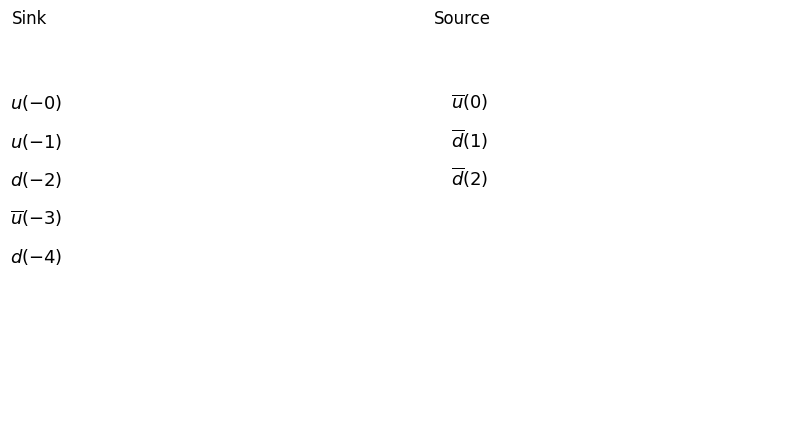

Diagram Number:0  -1 [u_quark_propagator(-0|-3) u_quark_propagator(-1|+0) d_quark_propagator(-2|+1) d_quark_propagator(-4|+2)]
Diagram Number:1  1 [u_quark_propagator(-0|-3) u_quark_propagator(-1|+0) d_quark_propagator(-2|+2) d_quark_propagator(-4|+1)]
Diagram Number:2  1 [u_quark_propagator(-0|+0) u_quark_propagator(-1|-3) d_quark_propagator(-2|+1) d_quark_propagator(-4|+2)]
Diagram Number:3  -1 [u_quark_propagator(-0|+0) u_quark_propagator(-1|-3) d_quark_propagator(-2|+2) d_quark_propagator(-4|+1)]


In [3]:
#To obtain the unsimplified Wick contractions use for the names of the hadrons small letters 
sink = [nucleonp, pim] 
source = [nucleon0B] 
result = Correlator_J(sink, source)
for i, x in enumerate(result):
    print(f"Diagram Number:{i} ", x[0], x[1])

<h1> Simplified Wick Contractions <h1>

In [47]:
def to_tuple(item):
    return tuple(map(to_tuple, item)) if isinstance(item, list) else item

def quarks_list(list_of_particles):
    list_of_baryons = ['n', 'd2', 'd1', 'd0', 'o', 's1', 's0', 'l']
    l_l_1 = len(list_of_particles)
    table_of_particles = {'n': [],
                    'd2': [],
                    'd1': [],
                    'd0': [],
                    'o': [],
                    's1': [],
                    's0': [],
                    'l': []}
    p_z = 0
    m_n = 0
    t_z = 0
    while t_z < l_l_1:
        if list_of_particles[t_z][0] in list_of_baryons:
            table_of_particles[list_of_particles[t_z][0]].append([3 * p_z + 2 * m_n, 3 * p_z + 1 + 2 * m_n, 3 * p_z + 2 + 2 * m_n])
            p_z += 1
        else:
            m_n += 1
        t_z += 1
    for i in list(table_of_particles):
        if len(table_of_particles[i]) == 0:
            del table_of_particles[i]
    return table_of_particles

def pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify):
    Simplified_Result0 = copy.deepcopy(result_to_simplify)
    Simplified_Result = copy.deepcopy(result_to_simplify)
    lenR = len(result_to_simplify)
    x = simplification_pair[0]
    y = simplification_pair[1]
    if location == 'sink':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:# [jY][1] corresponds to a diagram without the corresponding constant, while jZ to a pair contraction within the Diagram
                        q_f = jZ[0][0]# Remember we exchange the pairs at the sink q_f < 0, and jZ[0]->First q in pair, jZ[1] -> second quark
                        q_n = jZ[0][1]#We exchange quarks at sink -> we look at jZ[0][1] always!
                        Source_q_n = jZ[1]
                        if q_f < 0 and q_n == x: 
                            re_construct.append([[q_f, y], Source_q_n])
                        elif q_f < 0 and q_n == y:
                            re_construct.append([[q_f, x], Source_q_n])
                        else:
                            re_construct.append(jZ)
                    if set(to_tuple(re_construct)) == set(to_tuple(result_to_simplify[jX][1])):
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
                        Simplified_Result0[jX][0] = result_to_simplify[jX][0] + relative_sign * result_to_simplify[jY][0]
                        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

    if location == 'source':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[1][0]# Remember we exchange the pairs at the source q_f >0
                        q_n = jZ[1][1]#We exchange quarks at source -> we look at jZ[1][1] always!
                        Sink_q_n = jZ[0]
                        if q_f > 0 and q_n == x:
                            re_construct.append([Sink_q_n, [q_f, y]])
                        elif q_f > 0 and q_n == y:
                            re_construct.append([Sink_q_n, [q_f, x]])
                        else:
                            re_construct.append(jZ)
                    if set(to_tuple(re_construct)) == set(to_tuple(result_to_simplify[jX][1])):
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
                        Simplified_Result0[jX][0] = result_to_simplify[jX][0] + relative_sign * result_to_simplify[jY][0]
                        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result


def two_pair_simplifying(location, simplification_pair_1, simplification_pair_2, relative_sign, result_to_simplify):
    Simplified_Result0 = copy.deepcopy(result_to_simplify)
    Simplified_Result = copy.deepcopy(result_to_simplify)
    lenR = len(result_to_simplify)
    x = simplification_pair_1[0]
    y = simplification_pair_1[1]
    x2 = simplification_pair_2[0]
    y2 = simplification_pair_2[1]

    if location == 'sink':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[0][0]
                        q_n = jZ[0][1]
                        Source_q_n = jZ[1]
                        if q_f < 0 and q_n == x: 
                            re_construct.append([[q_f, y], Source_q_n])
                        elif q_f < 0 and q_n == y:
                            re_construct.append([[q_f, x], Source_q_n])
                        elif q_f < 0 and q_n == y2:
                            re_construct.append([[q_f, x2], Source_q_n])
                        elif q_f < 0 and q_n == x2: 
                            re_construct.append([[q_f, y2], Source_q_n])
                        else:
                            re_construct.append(jZ)
                    if set(to_tuple(re_construct)) == set(to_tuple(result_to_simplify[jX][1])):
                        print('two_pair_simplifying was used!')
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
                        Simplified_Result0[jX][0] = result_to_simplify[jX][0] + relative_sign * result_to_simplify[jY][0]
                        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

    if location == 'source':
        for jX in range(lenR):
            for jY in range(lenR):
                if jX < jY:
                    re_construct = []
                    for jZ in result_to_simplify[jY][1]:
                        q_f = jZ[1][0]# Remember we exchange the pairs at the source q_f >0
                        q_n = jZ[1][1]#We exchange quarks at source -> we look at jZ[1][1] always!
                        Sink_q_n = jZ[0]
                        if q_f > 0 and q_n == x:
                            re_construct.append([Sink_q_n, [q_f, y]])
                        elif q_f > 0 and q_n == y:
                            re_construct.append([Sink_q_n, [q_f, x]])
                        elif q_f > 0 and q_n == y1:
                            re_construct.append([Sink_q_n, [q_f, x1]])
                        elif q_f > 0 and q_n == x1:
                            re_construct.append([Sink_q_n, [q_f, y1]])
                        else:
                            re_construct.append(jZ)
                    if set(to_tuple(re_construct)) == set(to_tuple(result_to_simplify[jX][1])):
                        Simplified_Result0[jY][0] = 0
                        Simplified_Result0[jY][1] = 0
                        Simplified_Result0[jX][0] = result_to_simplify[jX][0] + relative_sign * result_to_simplify[jY][0]
                        Simplified_Result = [item for item in Simplified_Result0 if item != [0, 0]]
        return Simplified_Result

In [48]:
def permutation_sign(permuted_elements):
    inversions = 0
    nF = len(permuted_elements)
    for i in range(nF):
        for j in range(i + 1, nF):
            if permuted_elements[i] > permuted_elements[j]:
                inversions += 1
    sign = (-1) ** inversions
    return sign

def sgn(number):
    if number > 0:
        return '+'
    elif number < 0:
        return '-'
    else:
        return '0'

def Correlator_S(Sink, Source):

    def is_valid_contraction(candidate, Start_List):
        all_elements = [elem1 for pairK in candidate for elem1 in pairK]
        return len(set(map(tuple, all_elements))) == len(Start_List)


    
    def Generate_Contraction(Start_List):
        pairs = [list(pair) for pair in combinations(Start_List, 2)]
        possible_pairs = []
        for paar_contraction in pairs:
            if np.abs(paar_contraction[0][0]) == (np.abs(paar_contraction[1][0]) + 0.2) or (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                possible_pairs.append(paar_contraction)
        pairs2 = [list(pairX) for pairX in combinations(possible_pairs, len(Start_List) // 2)]
        final_solution = []
        for candidate in pairs2:
            if is_valid_contraction(candidate, Start_List):
                final_solution.append(candidate)
        return final_solution
    
    lSink = len(Sink)
    lSource = len(Source)
    #### Obtain the overall constant z0 ####
    z0 = 1
    total_operator = []
    source_plot = []
    sink_plot = []
    for i in range(lSink):
        z0 *= Sink[i][0]
    for j in range(lSource):
        z0 *= Source[j][0]
    #print("Overall factor: ", z0)
    #### Now combine all operators into one operator ####
    counter = 0
    for i in range(lSink):
        sub_list = []
        for quark in Sink[i][1]:
            sub_list.append([-1 * quark, counter])
            counter += 1
        total_operator.append(sub_list)
        sink_plot.append(sub_list)
    max_counter1 = counter
    counter = 0
    for j in range(lSource):
        sub_list = []
        for quark in Source[j][1]:
            sub_list.append([quark, counter])
            counter += 1
        source_plot.append(sub_list)
        total_operator.append(sub_list)
    max_counter2 = counter
    f_t_o = [quark for hadron in total_operator for quark in hadron]
    lf_t_o = len(f_t_o)
    first_Step = Generate_Contraction(f_t_o)
    second_Step = []
    sinkplot = [element for subliste in sink_plot for element in subliste]
    sourceplot = [element for subliste in source_plot for element in subliste]
    for diagram in first_Step:
        new_diagram = []
        for paar_contraction in diagram:
            if (np.abs(paar_contraction[0][0]) + 0.2) == np.abs(paar_contraction[1][0]):
                new_diagram.append(paar_contraction)
            else:
                new_diagram.append([paar_contraction[1], paar_contraction[0]])
        second_Step.append(new_diagram)
    sign_of_diagram = [0 for _ in second_Step]
    diagram_N = 0
    m_c = max_counter1 + 1
    for diagram in second_Step:
        numbers = []
        for paar_contraction in diagram:
            if paar_contraction[0][0] < 0:
                t1 = paar_contraction[0][1]
            else:
                t1 = paar_contraction[0][1] + m_c
            numbers.append(t1)
            if paar_contraction[1][0] < 0:
                t2 = paar_contraction[1][1]
            else:
                t2 = paar_contraction[1][1] + m_c
            numbers.append(t2)
        sign_of_diagram[diagram_N] = permutation_sign(numbers)
        diagram_N += 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.axis('off')
    ax1.set_title("Sink", loc='left')
    shift1 = 0
    shift2 = 0
    for quark in sinkplot:
        if np.abs(quark[0]) == 1:
            ax1.text(0.07, 0.8-shift1, fr'$u(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{u}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2:
            ax1.text(0.07, 0.8-shift1, fr'$d(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{d}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3:
            ax1.text(0.07, 0.8-shift1, fr'$s(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax1.text(0.07, 0.8-shift1, fr'$\overline{{s}}(-{quark[1]})$', fontsize=13, ha='center')
            shift1 += 0.1
    ax2.axis('off')
    ax2.set_title("Source", loc='left')
    for quark in sourceplot:
        if np.abs(quark[0]) == 1:
            ax2.text(0.1, 0.8-shift2, fr'$u({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 1.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{u}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2:
            ax2.text(0.1, 0.8-shift2, fr'$d({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 2.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{d}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3:
            ax2.text(0.1, 0.8-shift2, fr'$s({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
        if np.abs(quark[0]) == 3.2:
            ax2.text(0.1, 0.8-shift2, fr'$\overline{{s}}({quark[1]})$', fontsize=13, ha='center')
            shift2 += 0.1
    plt.show()
    last_step = [0 for _ in second_Step]
    for i, diagram in enumerate(second_Step):
        Diagram_Propagator_Form = [0 for _ in diagram]
        for j, pair_contraction in enumerate(diagram):
             Diagram_Propagator_Form[j] = pair_contraction
        last_step[i] = [sign_of_diagram[i] * z0, Diagram_Propagator_Form]
    return last_step


def Correlator_J_S(senken0, quelle0):
    ###
    l_l_1 = len(senken0)
    l_l_2 = len(quelle0)
    particles_at_the_sink = [[senken0[io1][0], io1] for io1 in range(l_l_1)]
    particles_at_the_source = [[quelle0[io1][0], io1] for io1 in range(l_l_2)]
    senken = [senken0[io1][1] for io1 in range(l_l_1)]
    quelle = [quelle0[io1][1] for io1 in range(l_l_2)]
    ###    
    def hadron_multiplication(hadrons):
        elements = []
        for item in hadrons:
            if isinstance(item[0], list):
                elements.append(item)
            else:
                elements.append([item])
        result0 = list(product(*elements))
        result = [list(tup) for tup in result0]
        return result
    sink0 = hadron_multiplication(senken)
    lenL = len(sink0)
    source0 = hadron_multiplication(quelle)
    lenR = len(source0)
    number_of_correlators = lenL * lenR
    Total_Wick_Contraction0 = [0 for i in range(number_of_correlators)]
    zeiger = 0
    for iL in range(lenL):
        for iR in range(lenR):
            Sink = sink0[iL]
            Source = source0[iR]
            Total_Wick_Contraction0[zeiger] = Correlator_S(Sink, Source)
            zeiger += 1
    Total_Wick_Contraction0 = [Final_element for sublist_1 in Total_Wick_Contraction0 for Final_element in sublist_1]
    result_to_simplify = copy.deepcopy(Total_Wick_Contraction0)
    
    
    
    ######## NOW WE DO THE SIMPLIFICATION (pairs are still not simultaneously simplified) ########
    relative_sign = -1



    
    #I: At the sink:##########################################################################################################################################
    sp0 = quarks_list(particles_at_the_sink)
    location = 'sink'

    
    for quark_type in sp0:

    ##Nucleon, Sigma, Xi, Delta+
        if quark_type == 'n' or quark_type == 's1' or quark_type == 'x' or quark_type == 'd1':
            l_n_t_s = len(sp0[quark_type])
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][0],sp0[quark_type][counter][1]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1
    ##Delta, Omega
        if quark_type == 'd2' or quark_type == 'o':
            l_n_t_s = len(sp0[quark_type])
            # Exchanging the first two quarks in uuu/ddd/sss
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1
            # Exchanging the first and third quarks in uuu/ddd/sss
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][2]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1
            # Exchanging the second and third quarks in uuu/ddd/sss
            counter = 0
            while counter < l_n_t_s: 
                simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1

        if quark_type == 'd0':
            l_n_t_s = len(sp0[quark_type])
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1

    
   #II: At the source:#########################################################################################################################################
    sp0 = quarks_list(particles_at_the_source)
    location = 'source'
    ##Nucleon, Sigma, Xi, Delta+
    for quark_type in sp0:
        if quark_type == 'n' or quark_type == 's1' or quark_type == 'x' or quark_type == 'd1':
            l_n_t_s = len(sp0[quark_type])
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1
    ##Delta, Omega
        if quark_type == 'd2' or quark_type == 'o':
            l_n_t_s = len(sp0[quark_type])
            # Exchanging the first two quarks in uuu/ddd
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1
            # Exchanging the first and third quarks in uuu/ddd
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][2]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1
            # Exchanging the second and third quarks in uuu/ddd
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][1], sp0[quark_type][counter][2]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1

        if quark_type == 'd0':
            l_n_t_s = len(sp0[quark_type])
            counter = 0
            while counter < l_n_t_s:
                simplification_pair = [sp0[quark_type][counter][0], sp0[quark_type][counter][1]]
                result_to_simplify = copy.deepcopy(pair_simplifying(location, simplification_pair, relative_sign, result_to_simplify))
                counter += 1
   ######## NOW WE DO THE SIMPLIFICATION for two pairs simultaneously ########

    relative_sign = +1

    #I: At the sink:##########################################################################################################################################
    sp0 = quarks_list(particles_at_the_sink)
    location = 'sink'

    group1 = ['n', 's1', 'x', 'd1']
    common_hadrons = list(set(group1).intersection(sp0))
    for i in common_hadrons:
        if len(sp0[i]) == 2:
            simplification_pair_1 = [sp0[i][0][0],sp0[i][0][1]]
            simplification_pair_2 = [sp0[i][1][0],sp0[i][1][1]]
            result_to_simplify = copy.deepcopy(two_pair_simplifying(location, simplification_pair_1, simplification_pair_2, relative_sign, result_to_simplify))
 #################################################################

    last_step_simplified = [0 for _ in result_to_simplify]
    for i, diagram in enumerate(result_to_simplify):
        Diagram_Propagator_Form = [0 for _ in diagram[1]]
        for j, pair_contraction in enumerate(diagram[1]):
            if np.abs(pair_contraction[0][0]) == 1:
                quark_line = f"u_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 2:
                quark_line = f"d_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            if np.abs(pair_contraction[0][0]) == 3:
                quark_line = f"s_quark_propagator({sgn(pair_contraction[0][0])}{pair_contraction[0][1]}|{sgn(pair_contraction[1][0])}{pair_contraction[1][1]})"
            Diagram_Propagator_Form[j] = quark_line
        last_step_simplified[i] = [diagram[0], "[" + " ".join(Diagram_Propagator_Form) + "]"]
    return last_step_simplified

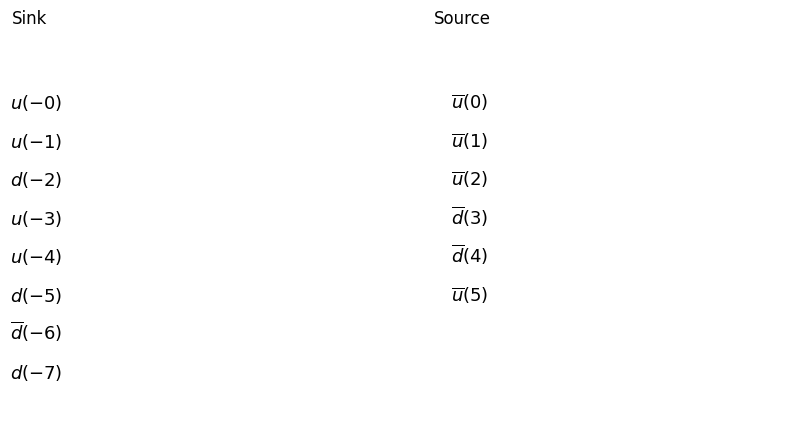

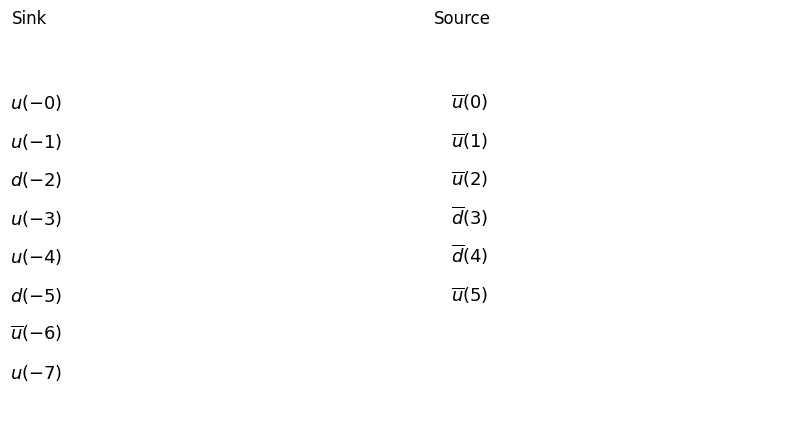

Diagram Number:1  12*sqrt(6) [u_quark_propagator(-0|+0) u_quark_propagator(-1|+1) d_quark_propagator(-2|-6) u_quark_propagator(-3|+2) u_quark_propagator(-4|+5) d_quark_propagator(-5|+3) d_quark_propagator(-7|+4)]
Diagram Number:2  -12*sqrt(6) [u_quark_propagator(-0|+0) u_quark_propagator(-1|+1) d_quark_propagator(-2|+3) u_quark_propagator(-3|+2) u_quark_propagator(-4|+5) d_quark_propagator(-5|-6) d_quark_propagator(-7|+4)]
Diagram Number:3  12*sqrt(6) [u_quark_propagator(-0|+0) u_quark_propagator(-1|+1) d_quark_propagator(-2|+3) u_quark_propagator(-3|+2) u_quark_propagator(-4|+5) d_quark_propagator(-5|+4) d_quark_propagator(-7|-6)]
Diagram Number:4  8*sqrt(6) [u_quark_propagator(-0|+0) u_quark_propagator(-1|+5) d_quark_propagator(-2|-6) u_quark_propagator(-3|+1) u_quark_propagator(-4|+2) d_quark_propagator(-5|+3) d_quark_propagator(-7|+4)]
Diagram Number:5  -8*sqrt(6) [u_quark_propagator(-0|+0) u_quark_propagator(-1|+5) d_quark_propagator(-2|+3) u_quark_propagator(-3|+1) u_quark_propag

In [52]:
senken0 = [Nucleonp, Nucleonp, Pi0]
quelle0 = [DeltappB, Delta0B]
resultx = Correlator_J_S(senken0, quelle0)
for i, x in enumerate(resultx):
    print(f"Diagram Number:{i + 1} ", x[0], x[1])

<h1> the two_pair_simplifying seems not to have been used! <h1>